##FIFA Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

# preprocessing

In [ ]:
fifa=pd.read_csv('data.csv')

fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [ ]:
cols=fifa.columns
print(fifa.columns)
print("rows,cols",fifa.shape)
cols=list(cols)


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
print("col-name",'\t\t'," null values total")
for i in cols:
  if (fifa[i].isnull().sum()!=0):
    print(i,fifa[i].isnull().sum(),fifa[i].dtypes,sep='\t\t\t')

col-name 		  null values total
Club			241			object
Preferred Foot			48			object
International Reputation			48			float64
Weak Foot			48			float64
Skill Moves			48			float64
Work Rate			48			object
Body Type			48			object
Real Face			48			object
Position			60			object
Jersey Number			60			float64
Joined			1553			object
Loaned From			16943			object
Contract Valid Until			289			object
Height			48			object
Weight			48			object
LS			2085			object
ST			2085			object
RS			2085			object
LW			2085			object
LF			2085			object
CF			2085			object
RF			2085			object
RW			2085			object
LAM			2085			object
CAM			2085			object
RAM			2085			object
LM			2085			object
LCM			2085			object
CM			2085			object
RCM			2085			object
RM			2085			object
LWB			2085			object
LDM			2085			object
CDM			2085			object
RDM			2085			object
RWB			2085			object
LB			2085			object
LCB			2085			object
CB			2085			object
RCB			2085			object
RB			2085			object
Crossing			48			float64
Finishing			48			float64
HeadingAccuracy			4

In [ ]:
df=fifa.copy()
df.drop(['Photo','Club Logo','Flag','Special','Joined','Jersey Number','Loaned From','Unnamed: 0','ID','Real Face',
         'Contract Valid Until'],axis=1,inplace=True)

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,4

In [ ]:
df['Value'].replace(to_replace=r'^€', value='', regex=True,inplace=True)
df['Value'].replace(to_replace=r'M', value='', regex=True,inplace=True)
df['Wage'].replace(to_replace=r'^€', value='', regex=True,inplace=True)
df['Wage'].replace(to_replace=r'K', value='', regex=True,inplace=True)
df['Value'].replace(to_replace=r'K', value='', regex=True,inplace=True)
df['Release Clause'].replace(to_replace=r'^€', value='', regex=True,inplace=True)
df['Release Clause'].replace(to_replace=r'M', value='', regex=True,inplace=True)
df['Release Clause'].replace(to_replace=r'K', value='', regex=True,inplace=True)
df['Weight'].replace(to_replace=r'lbs', value='', regex=True,inplace=True)
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,5'7,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77,405,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,6'2,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,5'9,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102,355,Right,4.0,5.0,4.0,High/ High,Normal,RCM,5'11,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,E. Hazard,27,Belgium,91,91,Chelsea,93,340,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,5'8,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60,1,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,5'9,134,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60,1,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,6'3,170,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113
18204,B. Worman,16,England,47,67,Cambridge United,60,1,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,5'8,148,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,3

In [ ]:
df['LS']=df['LS'].str.replace("+","",regex=True)
df['LS']=df['LS'].str.slice(stop=2)
temp=['RB','RCB','CB','LCB','LB','RWB','RDM','CDM','LDM','LWB','RM','RCM','CM','LCM','LM','RAM','CAM','LAM','RW','RF','CF','LF','LW','RS','ST']
for i in temp:
  df[i]=df[i].str.replace("+","",regex=True)
  df[i]=df[i].str.slice(stop=2)
  df[i]=df[i].astype(float)



In [ ]:
df['Value']=df['Value'].astype(float)
df['Wage']=df['Wage'].astype(float)
df['Release Clause']=df['Release Clause'].astype(float)
df['Weight']=df['Weight'].astype(float)


In [ ]:
df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean', 'Stocky',
       'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 0 to 18206
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      14743 non-null  object 
 1   Age                       14743 non-null  int64  
 2   Nationality               14743 non-null  object 
 3   Overall                   14743 non-null  int64  
 4   Potential                 14743 non-null  int64  
 5   Club                      14743 non-null  object 
 6   Value                     14743 non-null  float64
 7   Wage                      14743 non-null  float64
 8   Preferred Foot            14743 non-null  object 
 9   International Reputation  14743 non-null  float64
 10  Weak Foot                 14743 non-null  float64
 11  Skill Moves               14743 non-null  float64
 12  Work Rate                 14743 non-null  object 
 13  Body Type                 14743 non-null  object 
 14  Positi

In [ ]:
le = preprocessing.LabelEncoder()
df['Preferred Foot']=le.fit_transform(df['Preferred Foot'].astype(str))
#0->left 
df['Work Rate']=le.fit_transform(df['Work Rate'].astype(str))
df['Position']=le.fit_transform(df['Position'].astype(str))
df['Body Type']=le.fit_transform(df['Body Type'].astype(str))
df['Nationality']=le.fit_transform(df['Nationality'].astype(str))
df['Club']=le.fit_transform(df['Club'].astype(str))


In [ ]:
def clean_height(val):
    test=[]
    value=[]
    if isinstance(val,str):
        test=val.split("'")
        i=test[0]
        j=test[1]
        value=(int(i*12)+int(j))/12
    return(value)   
df["Height"]=df["Height"].apply(clean_height) 


In [ ]:
fb3=df.drop(axis=1,columns=['Name','Nationality','Club'])
fb3

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,110.5,565.0,0,5.0,4.0,4.0,8,3,20,4.629630e+10,159.0,88,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,33,94,94,77.0,405.0,1,5.0,4.0,5.0,1,1,25,5.555556e+10,183.0,91,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,26,92,93,118.5,290.0,1,5.0,5.0,5.0,2,4,13,4.629630e+10,150.0,84,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
4,27,91,92,102.0,355.0,1,4.0,5.0,4.0,0,5,18,4.629630e+10,154.0,82,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,27,91,91,93.0,340.0,1,4.0,4.0,4.0,2,5,10,4.629630e+10,163.0,83,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,82.0,82.0,82.0,89.0,66.0,63.0,63.0,63.0,66.0,60.0,49.0,49.0,49.0,60.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,60.0,1.0,1,1.0,2.0,2.0,8,2,4,4.629630e+10,134.0,42,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0
18203,19,47,63,60.0,1.0,1,1.0,2.0,2.0,8,5,25,5.555556e+10,170.0,45,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0
18204,16,47,67,60.0,1.0,1,1.0,3.0,2.0,8,5,25,4.629630e+10,148.0,45,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0
18205,17,47,66,60.0,1.0,1,1.0,3.0,2.0,8,2,23,4.629630e+10,154.0,47,47.0,47.0,47.0,46.0,46.0,46.0,47.0,45.0,45.0,45.0,46.0,39.0,39.0,39.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,31.

In [ ]:
df.corr()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,1.000000,-0.037247,0.464844,-0.252629,-0.002007,-0.039121,0.151363,-0.004498,0.254047,0.096831,0.111749,-0.113664,0.199084,0.020515,0.064953,0.219566,0.299036,0.299036,0.210483,0.242827,0.242827,0.242827,0.210483,0.252122,0.252122,0.252122,0.236587,0.369334,0.369334,0.369334,0.236587,0.333514,0.384132,0.384132,0.384132,0.333514,0.317738,0.344339,0.344339,0.344339,0.317738,0.271223,0.153196,0.351395,0.315379,0.252324,0.113431,0.268672,0.315787,0.310769,0.265412,-0.206900,-0.199252,-0.013683,0.462202,-0.092632,0.313618,0.185160,0.224142,0.364906,0.281738,0.401606,0.282348,0.197982,0.248619,0.257530,0.478604,0.235756,0.208014,0.178729,0.066528,0.070710,0.073311,0.076935,0.078028,-0.041727
Nationality,-0.037247,1.000000,-0.015483,0.007667,0.011128,0.011430,-0.021440,-0.003283,-0.006726,0.001035,-0.002175,-0.002153,-0.037196,-0.000402,0.006643,-0.047487,-0.003730,-0.003730,0.003849,0.004062,0.004062,0.004062,0.003849,0.008010,0.008010,0.008010,0.005553,0.014477,0.014477,0.014477,0.005553,0.007952,0.012164,0.012164,0.012164,0.007952,0.006949,0.004568,0.004568,0.004568,0.006949,0.016448,-0.003768,-0.020489,0.019683,0.008164,0.005979,0.043352,0.010236,0.025941,0.017267,-0.020901,-0.025977,-0.019940,-0.017609,0.008233,0.009623,0.000022,-0.025371,-0.043732,0.005246,0.016480,0.007569,0.005260,0.015886,-0.011797,-0.020464,0.007354,0.015069,0.014206,-0.008951,-0.000873,-0.010848,0.004741,-0.008293,-0.001941
Overall,0.464844,-0.015483,1.000000,0.653330,0.003828,-0.257851,0.577849,-0.032006,0.506117,0.207483,0.506531,-0.245248,0.097768,0.047612,0.069905,0.185932,0.673515,0.673515,0.618959,0.647743,0.647743,0.647743,0.618959,0.663568,0.663568,0.663568,0.667186,0.777063,0.777063,0.777063,0.667186,0.644602,0.628070,0.628070,0.628070,0.644602,0.579861,0.473352,0.473352,0.473352,0.579861,0.501231,0.374540,0.473601,0.726847,0.450492,0.518117,0.504602,0.459351,0.592881,0.722543,0.150641,0.171986,0.244317,0.851622,0.060421,0.565346,0.230638,0.468505,0.348386,0.503044,0.464563,0.345401,0.440457,0.530018,0.393033,0.806597,0.315256,0.275329,0.235036,0.040689,0.047210,0.053997,0.042139,0.043378,-0.417279
Potential,-0.252629,0.007667,0.653330,1.000000,-0.007023,-0.263317,0.489685,-0.024852,0.381177,0.140527,0.413635,-0.145751,-0.069646,0.004551,0.021063,0.015151,0.434397,0.434397,0.438462,0.450485,0.450485,0.450485,0.438462,0.463081,0.463081,0.463081,0.464326,0.497015,0.497015,0.497015,0.464326,0.379774,0.346072,0.346072,0.346072,0.379774,0.332200,0.225234,0.225234,0.225234,0.332200,0.276148,0.252364,0.231217,0.499880,0.267526,0.415195,0.306363,0.235876,0.368888,0.521715,0.229815,0.236745,0.208608,0.512728,0.119213,0.331671,0.073468,0.214974,0.055415,0.286781,0.168570,0.144090,0.273975,0.351643,0.229308,0.475882,0.154536,0.131526,0.114626,-0.024891,-0.016065,-0.011214,-0.020233,-0.034951,-0.405872
Club,-0.002007,0.011128,0.003828,-0.007023,1.000000,0.005624,-0.012642,-0.006740,0.007227,0.015273,0.009050,-0.033058,0.004146,0.008797,0.008152,0.017224,0.010896,0.010896,0.007868,0.009148,0.009148,0.009148,0.007868,0.009348,0.009348,0.009348,0.008045,0.009444,0.009444,0.009444,0.008045,0.001534,0.003132,0.003132,0.003132,0.001534,0.000191,0.000445,0.000445,0.000445,0.000191,0.004900,0.008724,0.001373,0.005679,0.016292,0.004792,0.021223,-0.001698,0.010909,0.011012,0.004352,-0.001368,0.000927,-0.003951,-0.000882,0.018887,0.009332,0.003911,0.006773,0.01

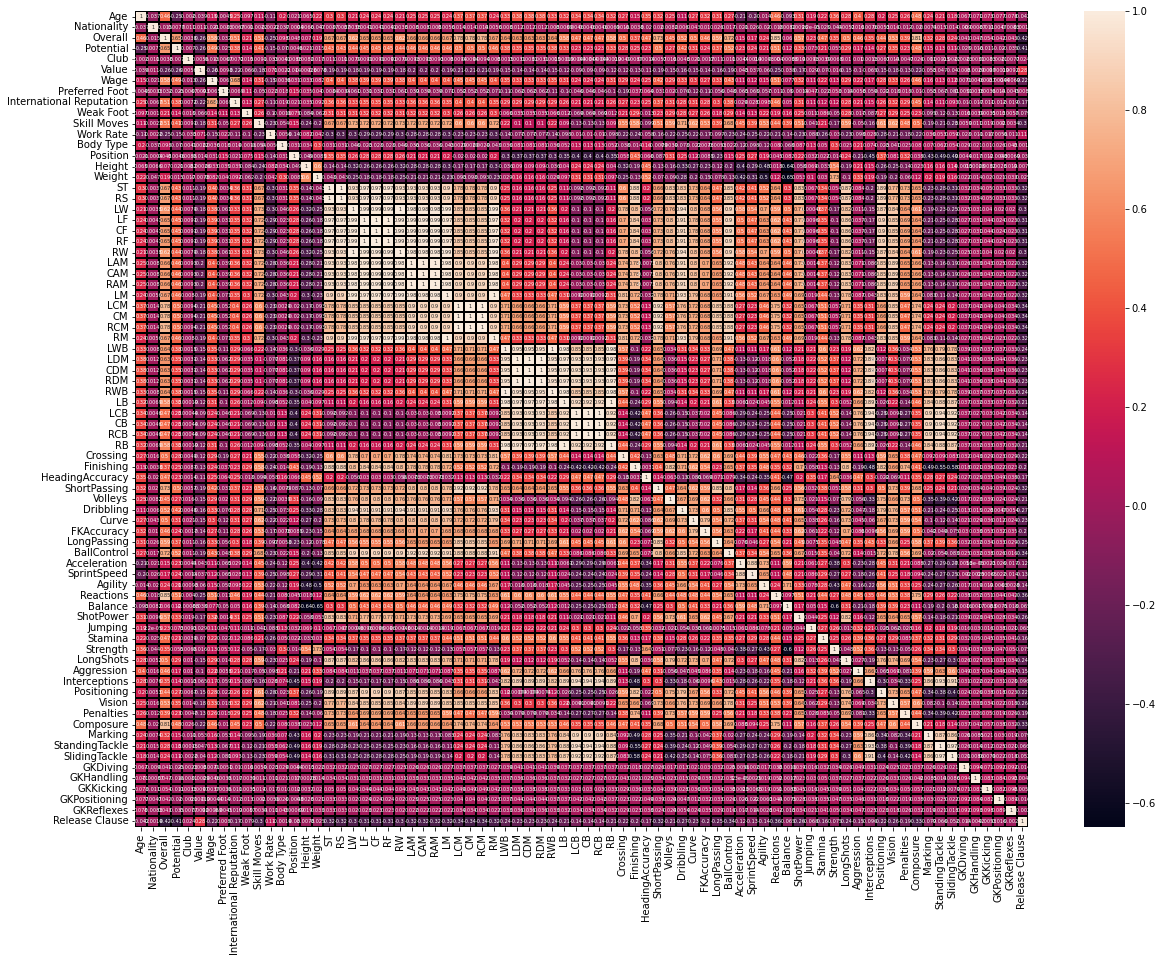

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True,annot_kws={'size': 5},linewidths=1,linecolor='black')

In [ ]:
df.describe()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,1.474300e+04,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.00000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.00000,14743.000000,14743.000000,14743.000000,14743.00000
mean,25.114088,74.751136,66.381808,71.334871,324.720817,272.896887,9.990640,0.753985,1.117073,3.001221,2.523435,5.531371,4.080241,11.396052,5.030887e+10,164.102015,57.690769,57.690769,58.920030,58.594587,58.594587,58.594587,58.920030,58.872821,58.872821,58.872821,59.639693,58.170115,58.170115,58.170115,59.639693,57.550024,56.884623,56.884623,56.884623,57.550024,56.863325,55.710303,55.710303,55.710303,56.863325,54.150783,49.554840,56.98908,62.580140,46.590518,60.425965,51.171471,46.405752,56.098962,63.062335,67.835380,67.896832,66.365258,62.165638,66.602862,59.475141,66.085193,67.387031,65.924981,51.255715,59.731601,50.634674,54.672997,55.395985,51.998101,60.304823,51.464763,52.115105,49.838160,10.503764,10.55952,10.560537,10.528793,10.506817,224.93481
std,4.594359,46.463930,6.889961,6.099177,188.107872,292.441226,22.834381,0.430702,0.400780,0.635514,0.616425,2.916386,1.744151,8.639820,4.588479e+09,14.774781,9.130883,9.130883,9.889666,9.849353,9.849353,9.849353,9.889666,9.784514,9.784514,9.784514,9.275242,8.845634,8.845634,8.845634,9.275242,8.999227,10.102019,10.102019,10.102019,8.999227,9.543208,11.706942,11.706942,11.706942,9.543208,14.163962,16.344687,11.61646,9.845651,14.792342,12.547495,15.171919,15.103861,12.400078,10.045939,11.780846,11.512529,12.353436,8.865933,12.160377,13.261653,11.543718,11.266826,12.572630,15.763188,14.411320,18.752402,14.700189,12.934748,12.528973,10.232503,17.167619,19.085715,19.081212,3.099594,3.08087,3.144226,3.075250,3.103504,301.67153
min,16.000000,0.000000,46.000000,48.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.629630e+10,110.000000,31.000000,31.000000,25.000000,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,30.000000,28.000000,28.000000,28.000000,30.000000,29.000000,25.000000,25.000000,25.000000,29.000000,11.000000,10.000000,15.00000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,26.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.000000,10.000000,10.000000,10.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000
25%,21.000000,34.000000,62.000000,67.000000,162.000000,4.800000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000,4.629630e+10,15

In [ ]:
df.corr()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,1.000000,-0.037247,0.464844,-0.252629,-0.002007,-0.039121,0.151363,-0.004498,0.254047,0.096831,0.111749,-0.113664,0.199084,0.020515,0.064953,0.219566,0.299036,0.299036,0.210483,0.242827,0.242827,0.242827,0.210483,0.252122,0.252122,0.252122,0.236587,0.369334,0.369334,0.369334,0.236587,0.333514,0.384132,0.384132,0.384132,0.333514,0.317738,0.344339,0.344339,0.344339,0.317738,0.271223,0.153196,0.351395,0.315379,0.252324,0.113431,0.268672,0.315787,0.310769,0.265412,-0.206900,-0.199252,-0.013683,0.462202,-0.092632,0.313618,0.185160,0.224142,0.364906,0.281738,0.401606,0.282348,0.197982,0.248619,0.257530,0.478604,0.235756,0.208014,0.178729,0.066528,0.070710,0.073311,0.076935,0.078028,-0.041727
Nationality,-0.037247,1.000000,-0.015483,0.007667,0.011128,0.011430,-0.021440,-0.003283,-0.006726,0.001035,-0.002175,-0.002153,-0.037196,-0.000402,0.006643,-0.047487,-0.003730,-0.003730,0.003849,0.004062,0.004062,0.004062,0.003849,0.008010,0.008010,0.008010,0.005553,0.014477,0.014477,0.014477,0.005553,0.007952,0.012164,0.012164,0.012164,0.007952,0.006949,0.004568,0.004568,0.004568,0.006949,0.016448,-0.003768,-0.020489,0.019683,0.008164,0.005979,0.043352,0.010236,0.025941,0.017267,-0.020901,-0.025977,-0.019940,-0.017609,0.008233,0.009623,0.000022,-0.025371,-0.043732,0.005246,0.016480,0.007569,0.005260,0.015886,-0.011797,-0.020464,0.007354,0.015069,0.014206,-0.008951,-0.000873,-0.010848,0.004741,-0.008293,-0.001941
Overall,0.464844,-0.015483,1.000000,0.653330,0.003828,-0.257851,0.577849,-0.032006,0.506117,0.207483,0.506531,-0.245248,0.097768,0.047612,0.069905,0.185932,0.673515,0.673515,0.618959,0.647743,0.647743,0.647743,0.618959,0.663568,0.663568,0.663568,0.667186,0.777063,0.777063,0.777063,0.667186,0.644602,0.628070,0.628070,0.628070,0.644602,0.579861,0.473352,0.473352,0.473352,0.579861,0.501231,0.374540,0.473601,0.726847,0.450492,0.518117,0.504602,0.459351,0.592881,0.722543,0.150641,0.171986,0.244317,0.851622,0.060421,0.565346,0.230638,0.468505,0.348386,0.503044,0.464563,0.345401,0.440457,0.530018,0.393033,0.806597,0.315256,0.275329,0.235036,0.040689,0.047210,0.053997,0.042139,0.043378,-0.417279
Potential,-0.252629,0.007667,0.653330,1.000000,-0.007023,-0.263317,0.489685,-0.024852,0.381177,0.140527,0.413635,-0.145751,-0.069646,0.004551,0.021063,0.015151,0.434397,0.434397,0.438462,0.450485,0.450485,0.450485,0.438462,0.463081,0.463081,0.463081,0.464326,0.497015,0.497015,0.497015,0.464326,0.379774,0.346072,0.346072,0.346072,0.379774,0.332200,0.225234,0.225234,0.225234,0.332200,0.276148,0.252364,0.231217,0.499880,0.267526,0.415195,0.306363,0.235876,0.368888,0.521715,0.229815,0.236745,0.208608,0.512728,0.119213,0.331671,0.073468,0.214974,0.055415,0.286781,0.168570,0.144090,0.273975,0.351643,0.229308,0.475882,0.154536,0.131526,0.114626,-0.024891,-0.016065,-0.011214,-0.020233,-0.034951,-0.405872
Club,-0.002007,0.011128,0.003828,-0.007023,1.000000,0.005624,-0.012642,-0.006740,0.007227,0.015273,0.009050,-0.033058,0.004146,0.008797,0.008152,0.017224,0.010896,0.010896,0.007868,0.009148,0.009148,0.009148,0.007868,0.009348,0.009348,0.009348,0.008045,0.009444,0.009444,0.009444,0.008045,0.001534,0.003132,0.003132,0.003132,0.001534,0.000191,0.000445,0.000445,0.000445,0.000191,0.004900,0.008724,0.001373,0.005679,0.016292,0.004792,0.021223,-0.001698,0.010909,0.011012,0.004352,-0.001368,0.000927,-0.003951,-0.000882,0.018887,0.009332,0.003911,0.006773,0.01

In [ ]:
df.drop(['Release Clause'],axis=1)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,6,94,94,212,110.5,565.0,0,5.0,4.0,4.0,8,3,20,4.629630e+10,159.0,88,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,120,94,94,326,77.0,405.0,1,5.0,4.0,5.0,1,1,25,5.555556e+10,183.0,91,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,20,92,93,435,118.5,290.0,1,5.0,5.0,5.0,2,4,13,4.629630e+10,150.0,84,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,K. De Bruyne,27,13,91,92,374,102.0,355.0,1,4.0,5.0,4.0,0,5,18,4.629630e+10,154.0,82,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,E. Hazard,27,13,91,91,134,93.0,340.0,1,4.0,4.0,4.0,2,5,10,4.629630e+10,163.0,83,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,82.0,82.0,82.0,89.0,66.0,63.0,63.0,63.0,66.0,60.0,49.0,49.0,49.0,60.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,46,47,65,165,60.0,1.0,1,1.0,2.0,2.0,8,2,4,4.629630e+10,134.0,42,42.0,42.0,44.0,44.0,44.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,44.0,44.0,45.0,45.0,45.0,44.0,45.0,45.0,45.0,45.0,45.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,140,47,63,587,60.0,1.0,1,1.0,2.0,2.0,8,5,25,5.555556e+10,170.0,45,45.0,45.0,39.0,42.0,42.0,42.0,39.0,40.0,40.0,40.0,38.0,35.0,35.0,35.0,38.0,30.0,31.0,31.0,31.0,30.0,29.0,32.0,32.0,32.0,29.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,46,47,67,122,60.0,1.0,1,1.0,3.0,2.0,8,5,25,4.629630e+10,148.0,45,45.0,45.0,45.0,46.0,46.0,46.0,45.0,44.0,44.0,44.0,44.0,38.0,38.0,38.0,44.0,34.0,30.0,30.0,30.0,34.0,33.0,28.0,28.0,28.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,46,47,66,586,60.0,1.0,1,1

# visualozation

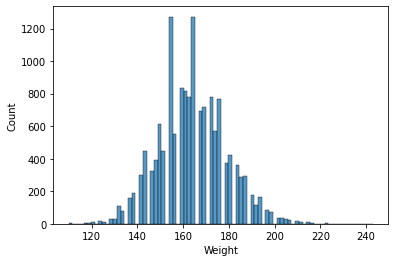

In [ ]:
sns.histplot(df['Weight'])



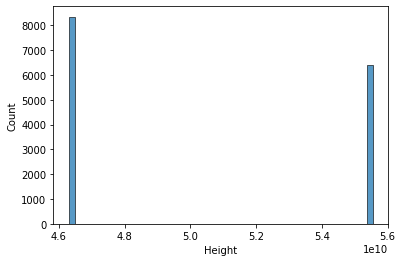

In [ ]:
sns.histplot(df['Height'],bins=50)

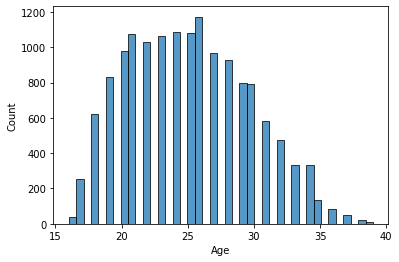

In [ ]:
sns.histplot(df['Age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


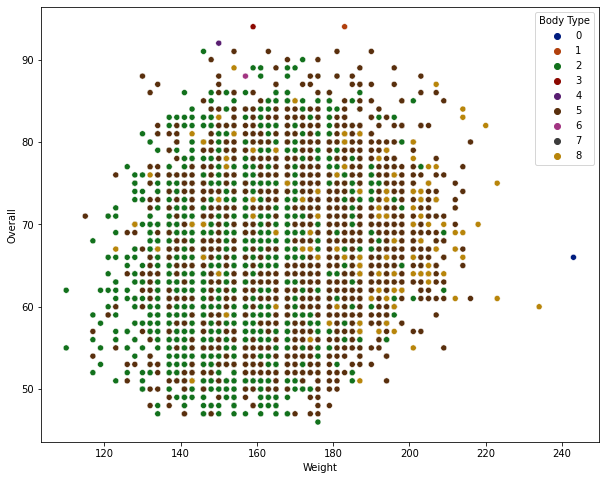

In [ ]:
plt.subplots(figsize=(10,8))
sns.scatterplot(df['Weight'],df['Overall'],hue=df['Body Type'],palette='dark')

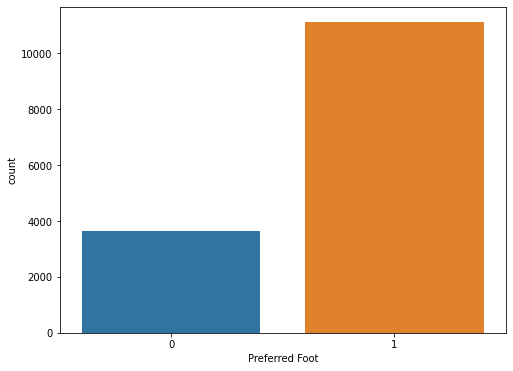

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


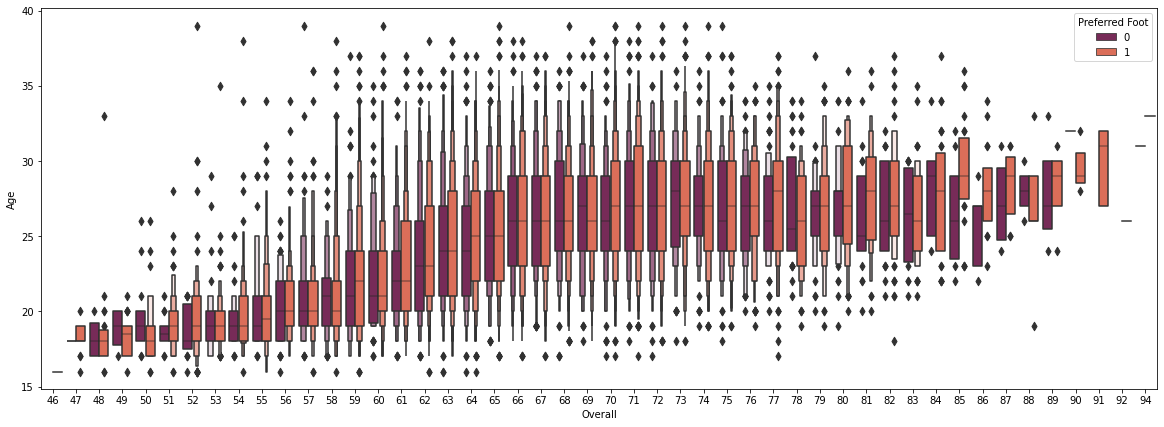

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')

# model

In [ ]:
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cols=list(fb3.columns)
cols

In [ ]:
ms = MinMaxScaler()
livearr= ms.fit_transform(fb3)*100
fb3 = pd.DataFrame(livearr, columns=[cols])
fb3


,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,65.217391,100.000000,97.872340,11.242300,100.000000,0.0,100.0,75.0,66.666667,100.0,37.5,80.0,5.400036e-09,36.842105,95.000000,95.000000,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,93.103448,93.103448,93.103448,100.0000,61.818182,55.932203,55.932203,55.932203,61.818182,54.545455,35.483871,35.483871,35.483871,54.545455,89.024390,100.000000,69.620253,95.890411,95.00,100.000000,98.795181,100.000000,91.891892,100.000000,92.207792,85.714286,93.150685,98.666667,98.648649,87.654321,59.701493,65.217391,47.222222,100.000000,42.682927,14.634146,98.809524,100.000000,78.75,100.000000,27.380952,21.686747,19.753086,13.888889,31.250,35.0,40.625,19.444444,22.595190
1,73.913043,100.000000,97.872340,7.802875,71.631206,100.0,100.0,75.0,100.000000,12.5,12.5,100.0,1.000000e+02,54.887218,100.000000,100.000000,100.000000,95.522388,95.454545,95.454545,95.454545,95.522388,92.424242,92.424242,92.424242,95.3125,87.931034,87.931034,87.931034,95.3125,63.636364,55.932203,55.932203,55.932203,63.636364,58.181818,45.161290,45.161290,45.161290,58.181818,89.024390,98.823529,93.670886,83.561644,96.25,89.156627,84.337349,78.571429,78.378378,97.183099,89.610390,92.857143,87.671233,100.000000,64.864865,100.000000,100.000000,88.405797,75.000000,98.795181,60.975610,23.170732,100.000000,85.365854,91.25,98.507463,21.428571,25.301205,16.049383,16.666667,31.250,35.0,40.625,27.777778,12.635271
2,43.478261,95.833333,95.744681,12.063655,51.241135,100.0,100.0,100.0,100.000000,25.0,50.0,52.0,7.200018e-09,30.075188,88.333333,88.333333,88.333333,95.522388,93.939394,93.939394,93.939394,95.522388,93.939394,93.939394,93.939394,95.3125,87.931034,87.931034,87.931034,95.3125,63.636364,54.237288,54.237288,54.237288,63.636364,56.363636,35.483871,35.483871,35.483871,56.363636,82.926829,90.588235,59.493671,87.671233,92.50,98.795181,92.771084,91.666667,79.729730,98.591549,96.103896,91.428571,100.000000,97.333333,83.783784,81.481481,49.253731,78.260870,33.333333,85.542169,52.439024,31.707317,92.857143,91.463415,86.25,97.014925,20.238095,16.867470,28.395062,22.222222,25.000,35.0,43.750,27.777778,22.755511
3,47.826087,93.750000,93.617021,10.369610,62.765957,100.0,75.0,100.0,66.666667,0.0,62.5,72.0,9.000001e-09,33.082707,85.000000,85.000000,85.000000,92.537313,90.909091,90.909091,90.909091,92.537313,92.424242,92.424242,92.424242,95.3125,98.275862,98.275862,98.275862,95.3125,85.454545,83.050847,83.050847,83.050847,85.454545,80.000000,66.129032,66.129032,66.129032,80.000000,100.000000,84.705882,50.632911,98.630137,90.00,86.746988,89.156627,86.904762,97.297297,92.957746,75.324675,71.428571,76.712329,93.333333,74.324324,95.061728,52.238806,91.304348,69.444444,96.385542,76.829268,62.195122,90.476190,100.000000,83.75,88.059701,69.047619,57.831325,50.617284,38.888889,37.500,10.0,28.125,33.333333,19.579158
4,47.826087,93.750000,91.489362,9.445585,60.106383,100.0,75.0,75.0,66.666667,25.0,62.5,40.0,6.299938e-09,39.849624,86.666667,86.666667,86.666667,95.522388,92.424242,92.424242,92.424242,95.522388,93.939394,93.939394,93.939394,96.8750,89.655172,89.655172,89.655172,96.8750,65.454545,59.322034,59.322034,59.322034,65.454545,56.363636,38.709677,38.709677,38.709677,56.363636,85.365854,87.058824,58.227848,94.520548,87.50,97.590361,86.746988,82.142857,86.486486,97.183099,96.103896,88.571429,98.630137,92.000000,97.297297,83.950617,41.791045,81.159420,56.

In [ ]:
pca = PCA(2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


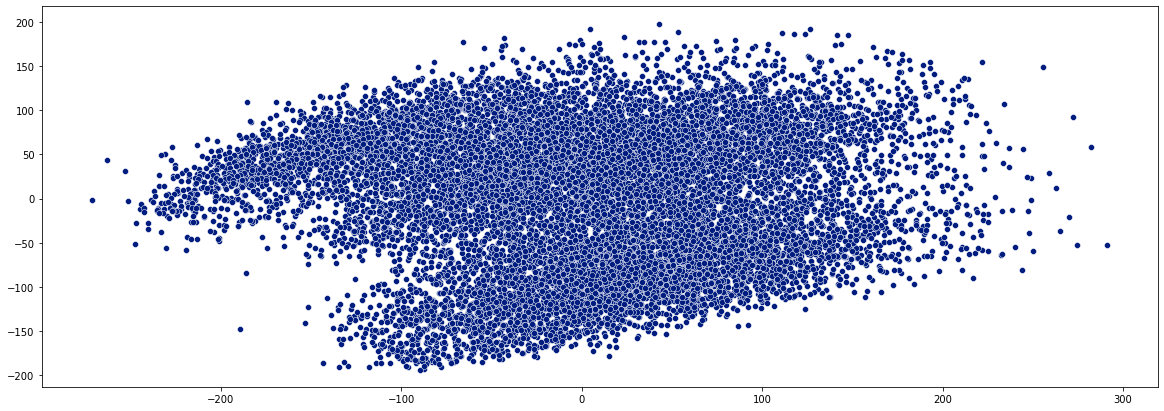

In [ ]:
fb2 = pca.fit_transform(fb3)
fb2
sns.scatterplot(fb2[:,0],fb2[:,1])

In [ ]:
model = Birch(branching_factor = 10, n_clusters = None, threshold = 2)
score=[]
score2=[]
for n_clusters in range(2,15):
    clusterer = Birch(branching_factor = 10, n_clusters = n_clusters, threshold = 2,)
    preds = clusterer.fit_predict(fb2)
    score.append( metrics.silhouette_score(fb2, preds,metric='mahalanobis'))
    score2.append(metrics.davies_bouldin_score(fb2,preds))
    print("For n_clusters = {}::   silhouette score is {})    ".format(n_clusters, score[len(score)-1]),end="\t")
    print("| For n_clusters = {}::   DB index score is {})".format(n_clusters, score2[len(score2)-1]))

For n_clusters = 2::   silhouette score is 0.30096940623491014)    	| For n_clusters = 2::   DB index score is 1.2821526510999253)
For n_clusters = 3::   silhouette score is 0.3342834765065697)    	| For n_clusters = 3::   DB index score is 0.8726139215251701)
For n_clusters = 4::   silhouette score is 0.34051788507361574)    	| For n_clusters = 4::   DB index score is 0.8522985051958603)
For n_clusters = 5::   silhouette score is 0.3066988890111414)    	| For n_clusters = 5::   DB index score is 0.8244778099408159)
For n_clusters = 6::   silhouette score is 0.2684814514838343)    	| For n_clusters = 6::   DB index score is 0.9045982728928754)
For n_clusters = 7::   silhouette score is 0.25865339718892094)    	| For n_clusters = 7::   DB index score is 0.9422485176405708)
For n_clusters = 8::   silhouette score is 0.2496163933598789)    	| For n_clusters = 8::   DB index score is 0.9233890885729819)
For n_clusters = 9::   silhouette score is 0.24216843390216242)    	| For n_clusters = 

In [ ]:

model12 = Birch(branching_factor = 10, n_clusters = 4, threshold = 2)
pred12=model12.fit_predict(fb2)



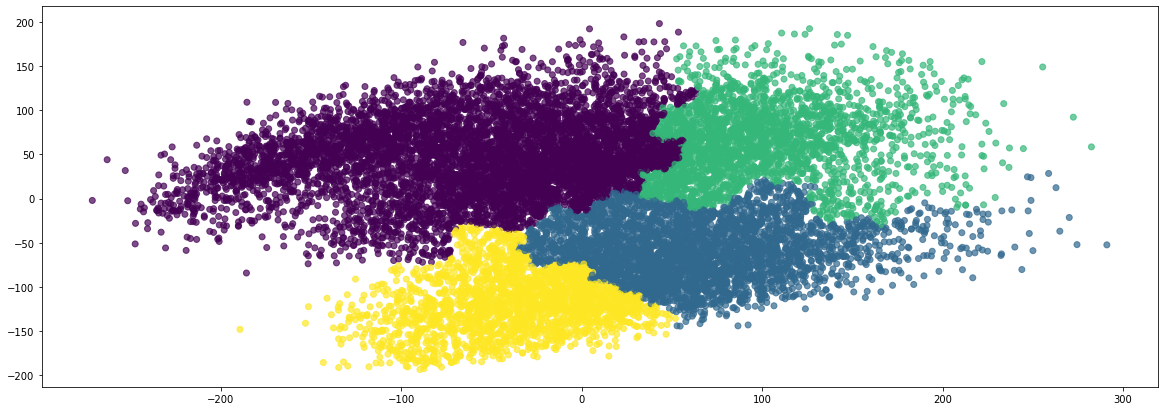

In [ ]:
plt.scatter(fb2[:, 0], fb2[:, 1], c = pred12,alpha=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


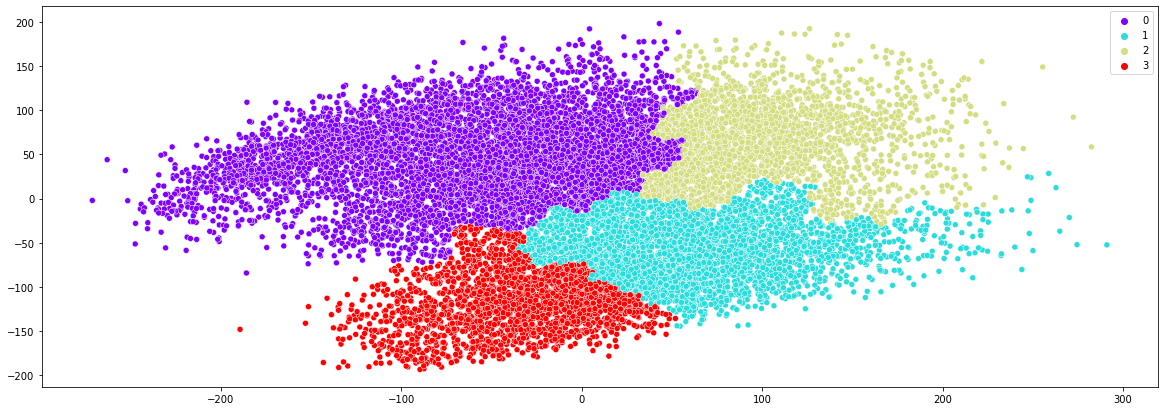

In [ ]:
sns.scatterplot(fb2[:,0],fb2[:,1],hue=pred12,palette='rainbow',legend='full')